Create a notebook to perform Runge-kutta integration

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Define a function to integrate

In [7]:
def dfdx(x,f):
    return x**2 +x

Define its integral

In [8]:
def f_int(x,C):
    return (x**3)/3. + 0.5*x**2 +C

## Define the 2nd order RK method

In [9]:
def rk2_core(x_i,f_i,h,g):
    #advanve f by a step h
    
    #half step
    x_ipoh = x_i + 0.5*h
    f_ipoh = f_i + 0.5*h*g(x_i,f_i)
    
    #full step
    f_ipo = f_i + h*g(x_ipoh, f_ipoh)
    
    return f_ipo

### Define a wrapper routine for RK2

In [11]:
def rk2(dfdx,a,b,f_a,N):
    #dfdx is the derivative wrt x
    #a is the lower bound
    #b is the upper bound
    #f_a is the boundary condition at a 
    #N is the number of steps
    
    #define out steps
    x = np.linspace(a,b,N)
    
    #a single step size
    h = x[1]-x[0]
    
    #an array to hold f
    f = np.zeros(N,dtype=float)
    
    f[0] = f_a #value of f at a
    
    #evolve f along x
    for i in range(1,N):
        f[i] = rk2_core(x[i-1],f[i-1],h,dfdx)
    
    return x,f
    

### Define the 4th order RK method

In [12]:
def rk4_core(x_i,f_i,h,g):
    
    #define x at 1/2 step
    x_ipoh = x_i + 0.5*h
    
    #define x at 1 step
    x_ipo = x_i +h
    
    #advance f by a step h
    
    k_1 = h*g(x_i,f_i)
    k_2 = h*g(x_ipoh, f_i + 0.5*k_1)
    k_3 = h*g(x_ipoh, f_i + 0.5*k_2)
    k_4 = h*g(x_ipo, f_i + k_3)
    
    f_ipo = f_i + (k_1 +2*k_2 +2*k_3 + k_4)/6.
    
    return f_ipo

Define a wrapper for RK4

In [13]:
def rk4(dfdx,a,b,f_a,N):
    
    #dfdx is the derivative wrt x
    #a is the lower bound
    #b is the upper bound
    #f_a is the boundary condition at a
    #N is the number of steps
    
    #define out steps
    x = np.linspace(a,b,N)
    
    #a single step size
    h = x[1]-x[0]
    
    #an array to hold f
    f = np.zeros(N,dtype=float)
    
    f[0] = f_a #value of f at a
    
    #evolve f along x
    for i in range(1,N):
        f[i] = rk4_core(x[i-1],f[i-1],h,dfdx)
    return x,f

### Perform the integration

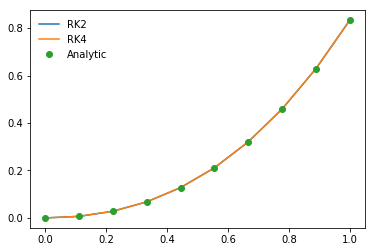

In [14]:
a = 0.0
b=1.0
f_a=0.0
N = 10
x_2,f_2 = rk2(dfdx,a,b,f_a,N)
x_4,f_4 = rk4(dfdx,a,b,f_a,N)
x = x_2.copy()
plt.plot(x_2,f_2,label='RK2')
plt.plot(x_4,f_4,label='RK4')
plt.plot(x,f_int(x,f_a),'o',label='Analytic')
plt.legend(frameon=False)

## Plot the error

TypeError: 'function' object is not subscriptable

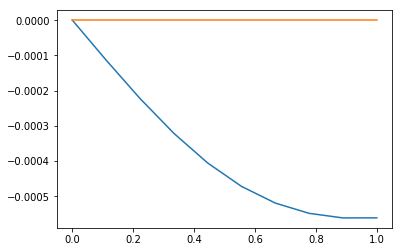

In [16]:
a = 0.0
b=1.0
f_a=1.0
N = 10
x_2,f_2 = rk2(dfdx,a,b,f_a,N)
x_4,f_4 = rk4(dfdx,a,b,f_a,N)
x = x_2.copy()
f_analytic = f_int(x,f_a)
error_2 = (f_2-f_analytic)/f_analytic
error_4 = (f_4-f_analytic)/f_analytic


plt.plot(x_2,error_2,label='RK2')
plt.plot(x_4,error_4,label='RK4')
plt.ylim[-1.e-3,1.0e-4]
plt.legend(frameon=False)

In [17]:
print(error_4)

[ 0.00000000e+00  0.00000000e+00 -2.15923322e-16 -2.07926162e-16
 -1.96842947e-16 -1.83284224e-16 -1.68089841e-16  0.00000000e+00
 -1.36292885e-16 -1.21115239e-16]
